In [1]:
%matplotlib inline

In [2]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [3]:
np.random.seed(2)

In [4]:
# Read data from file
df = pd.read_csv("mushrooms.csv")

In [5]:
##################################### Information about data ##################################
# data shape (8124 examples, 23 comlumns)
df.shape

(8124, 23)

In [6]:
# Modalities in class column: 2 classes poisonous 'p' or edible 'e'
df["class"].unique()

array(['p', 'e'], dtype=object)

In [7]:
# We have missing values for stalk-root feature coded as '?'. Let's check their numbers
df[df['stalk-root'] == '?'].shape[0]

2480

In [8]:
print("{} % of values are missing".format(round((df[df['stalk-root'] == '?'].shape[0]/df.shape[0])*100, 2)))

30.53 % of values are missing


### 2480 missing values sur les 8124 pour la variable "stalk-root".  Soit 30.53 % on supprime toute la colonne pour la suite.

In [9]:
df = df.drop(labels = ["stalk-root"], axis = 1)

### La distribution des classes : 
#### - comestible 4208 exemples
#### - vénéneux 3916 exemples

e    4208
p    3916
Name: class, dtype: int64

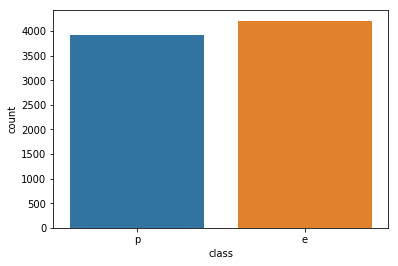

In [10]:
g = sns.countplot(df["class"])
df["class"].value_counts()

In [11]:
# Spilt data: 80% training 20% test
train, test = train_test_split(df, test_size=0.2)

e    3348
p    3151
Name: class, dtype: int64

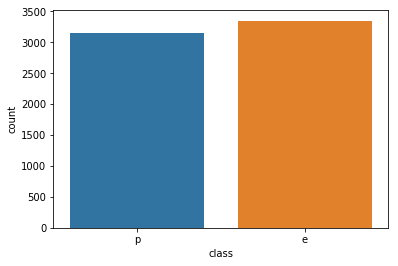

In [12]:
# Get responses of training
Y_train = train["class"]
# Get features of training
X_train = train.drop(labels = ["class"],axis = 1) 
# on vérifie la distribution de Y_train
Y_trainDist = sns.countplot(Y_train)
Y_train.value_counts()

e    860
p    765
Name: class, dtype: int64

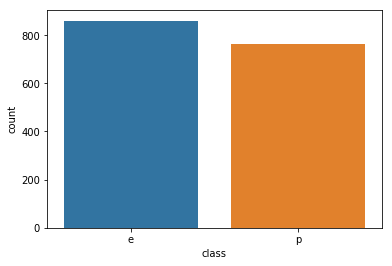

In [13]:
# Get responses of test
Y_test = test["class"]
# Get features of test
X_test = test.drop(labels = ["class"],axis = 1) 
# on vérifie la distribution de Y_test
Ytest_distribution = sns.countplot(Y_test)
Y_test.value_counts()

In [15]:
#svm, logit, RF, NN check results when we drop odor